In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
df = pd.read_csv('Data/nathanLeagueData.csv')
df.head()

,avgKills,avgDeaths,avgAssists,avgChampLevel,avgChampExperience,avgDoubleKills,avgTripleKills,avgQuadraKills,avgPentaKills,avgConsumablesPurchased,...,dragon_first,dragon_kills,inhibitor_first,inhibitor_kills,riftHerald_first,riftHerald_kills,tower_first,tower_kills,gameDuration,win
0,4.2,2.2,5.4,12.8,10658.2,0.6,0.0,0.0,0.0,3.0,...,False,1,False,0,False,0,True,4,1439,True
1,7.2,8.2,11.6,16.8,16904.0,1.0,0.6,0.0,0.0,5.0,...,False,3,False,1,True,1,True,5,2114,False
2,4.6,2.4,4.8,13.2,11000.0,0.2,0.0,0.0,0.0,3.6,...,True,2,True,2,False,1,True,10,1342,True
3,7.6,2.4,8.4,14.0,12470.4,0.8,0.0,0.0,0.0,3.8,...,False,2,True,2,True,1,True,9,1493,True
4,3.4,7.4,4.6,13.6,11586.0,0.0,0.0,0.0,0.0,2.2,...,True,1,False,0,True,1,True,4,1874,False


In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 114 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   avgKills                                716 non-null    float64
 1   avgDeaths                               716 non-null    float64
 2   avgAssists                              716 non-null    float64
 3   avgChampLevel                           716 non-null    float64
 4   avgChampExperience                      716 non-null    float64
 5   avgDoubleKills                          716 non-null    float64
 6   avgTripleKills                          716 non-null    float64
 7   avgQuadraKills                          716 non-null    float64
 8   avgPentaKills                           716 non-null    float64
 9   avgConsumablesPurchased                 716 non-null    float64
 10  avgDamageDealtToBuildings               716 non-null    float

In [7]:
to_drop_for_NA = [
    'avgTakedownsFirst25Minutes', 'avgKillsOnLanersEarlyJungleAsJungler', 'avgJunglerKillsEarlyJungle', 'avgEarliestBaron',
    'avgSoloTurretsLategame'
]
df.drop(to_drop_for_NA, axis=1, inplace=True)
df.dropna(inplace=True)


In [9]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 370
Data columns (total 109 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   avgKills                                342 non-null    float64
 1   avgDeaths                               342 non-null    float64
 2   avgAssists                              342 non-null    float64
 3   avgChampLevel                           342 non-null    float64
 4   avgChampExperience                      342 non-null    float64
 5   avgDoubleKills                          342 non-null    float64
 6   avgTripleKills                          342 non-null    float64
 7   avgQuadraKills                          342 non-null    float64
 8   avgPentaKills                           342 non-null    float64
 9   avgConsumablesPurchased                 342 non-null    float64
 10  avgDamageDealtToBuildings               342 non-null    float

In [10]:
data = df.drop('win', axis=1)
target = df.win
X = data.values
y = target.values

In [11]:
X = StandardScaler().fit_transform(X)
pd.DataFrame(X, columns=data.columns).head()

,avgKills,avgDeaths,avgAssists,avgChampLevel,avgChampExperience,avgDoubleKills,avgTripleKills,avgQuadraKills,avgPentaKills,avgConsumablesPurchased,...,champion_kills,dragon_first,dragon_kills,inhibitor_first,inhibitor_kills,riftHerald_first,riftHerald_kills,tower_first,tower_kills,gameDuration
0,-0.630802,-1.495917,-0.610721,-0.647746,-0.624041,0.109206,-0.643319,-0.249222,-0.076696,-0.806199,...,-0.638748,-0.988372,-0.730921,-0.878647,-0.804258,-1.066536,-1.102647,0.971175,-0.468114,-0.758346
1,0.708607,1.152591,1.005167,1.271918,1.152801,1.079294,4.105206,-0.249222,-0.076696,0.767546,...,0.703093,-0.988372,0.743858,-0.878647,0.112596,0.937614,0.206746,0.971175,-0.183247,1.046997
2,-0.452214,-1.407633,-0.767097,-0.455780,-0.526804,-0.860882,-0.643319,-0.249222,-0.076696,-0.334076,...,-0.459835,1.011765,0.006468,1.138113,1.029450,-1.066536,0.206746,0.971175,1.241084,-1.017780
3,0.887195,-1.407633,0.171160,-0.071847,-0.108496,0.594250,-0.643319,-0.249222,-0.076696,-0.176701,...,0.882005,-0.988372,0.006468,1.138113,1.029450,0.937614,0.206746,0.971175,0.956218,-0.613918
4,-0.987977,0.799457,-0.819222,-0.263813,-0.360095,-1.345926,-0.643319,-0.249222,-0.076696,-1.435697,...,-0.996572,1.011765,-0.730921,-0.878647,-0.804258,0.937614,0.206746,0.971175,-0.468114,0.405098


In [12]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

['pc1', 'pc2', 'pc3']

In [15]:
pc_df = pd.DataFrame(principal_components, columns=['pc'+str(i+1) for i in range(3)])

In [16]:
pc_df = pd.concat([pc_df, target], axis=1)
pc_df.head()

,pc1,pc2,pc3,win
0,-4.244882,2.024534,-0.073592,True
1,6.671812,-2.717577,0.599202,False
2,-2.626763,6.476444,-1.524852,True
3,0.346760,5.558998,0.565273,True
4,-2.506961,-3.044557,-1.953018,False


In [17]:
group_1 = data.columns[:19]
group_2 = data.columns[19:38]
group_3 = data.columns[38:57]
group_4 = data.columns[57:76]
group_5 = data.columns[76:95]
group_6 = data.columns[95:]
groups = [group_1 ,group_2 ,group_3 ,group_4 ,group_5 ,group_6]

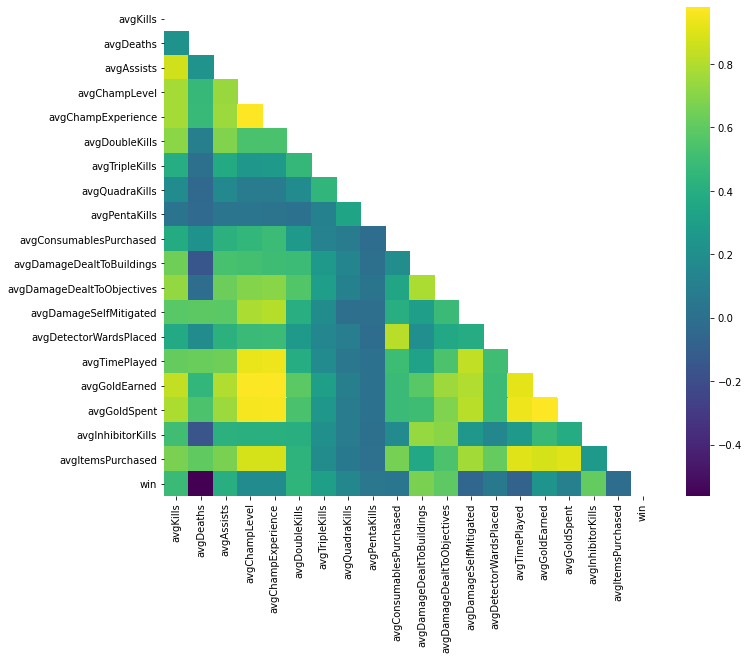

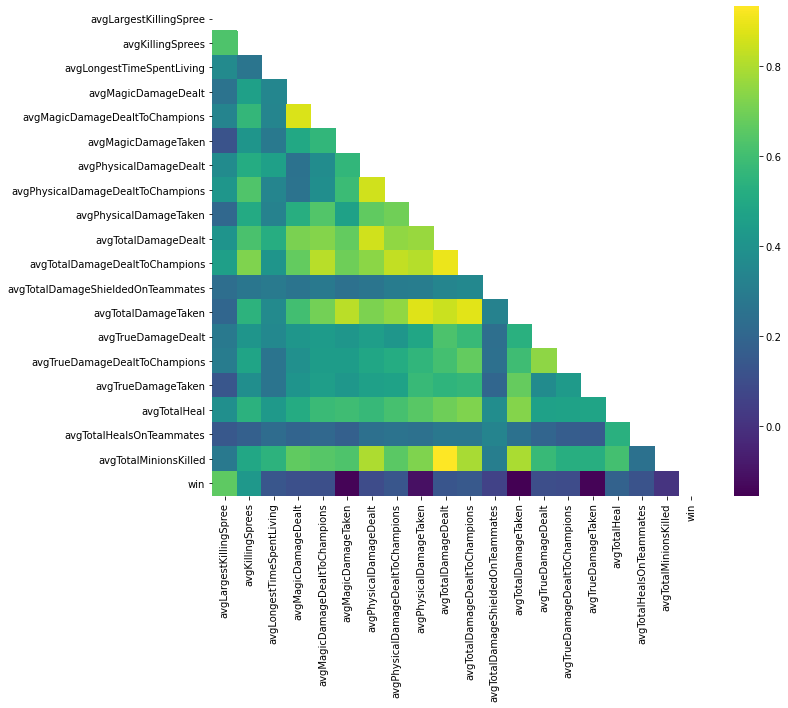

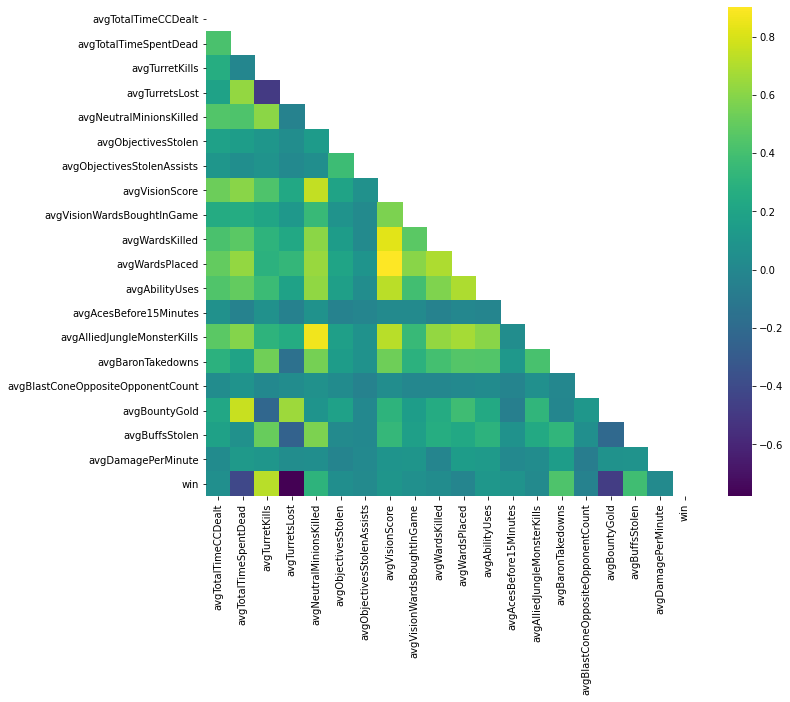

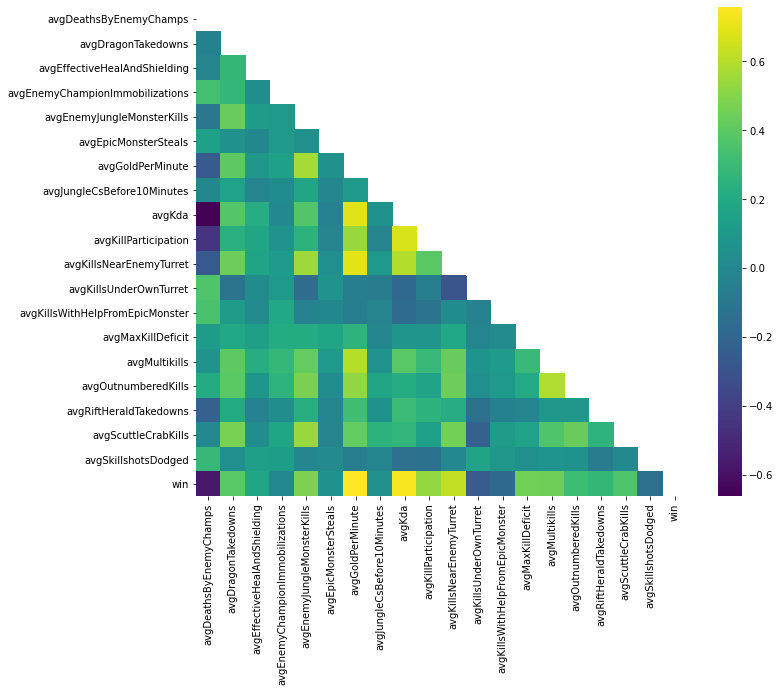

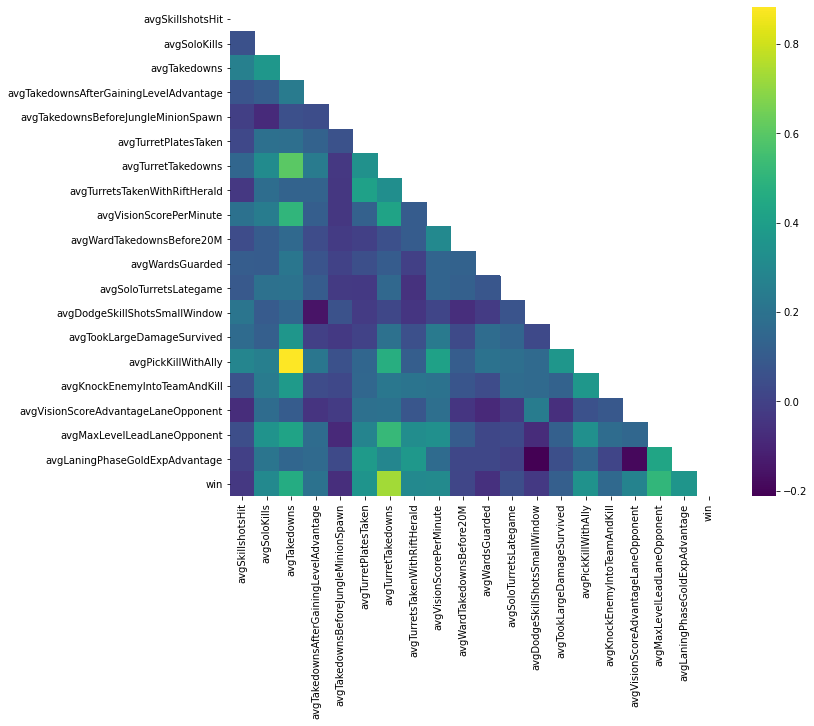

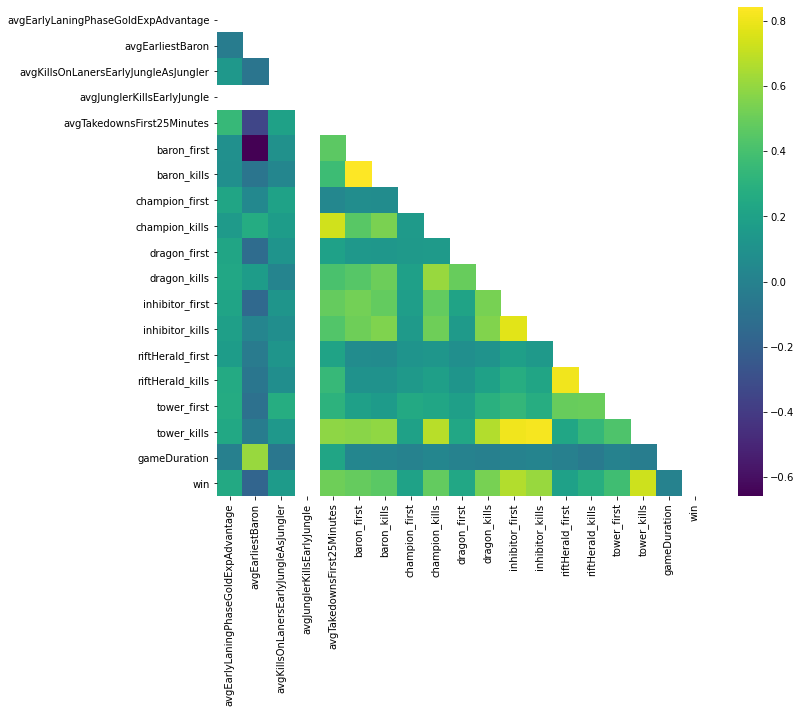

In [18]:
for group in groups:
    temp_df = pd.concat([data[group], target], axis=1)
    corr = temp_df.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    fig1, ax1 = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");